#**Visualising Rocket's Simulation Results in Python**

---
2nd June 2021

Author : [Naimish Mani B](https://www.linkedin.com/in/naimish-balaji-a6182b180/)


[Repo](https://github.com/Naimish240/rocket-lander)

---
Libraries Used:
- mat73
- Pandas
- Numpy
- MatPlotLib

---

This is a companion notebook to briefly summarise the results of the Simulink Simulation. The variables logged are as follows:

- h (height at which the rocket is flying at)
- x (downrange position of the rocket)
- v (velocity of the rocket)
- tht (pitch angle of the rocket)
- t (time)


**NOTE**:

The flight was broken up into two parts, one being powered liftoff and other being powered descent. The PID controller was only active during the powered descent phase.

# Setup

First, we need to install mat73 in order to read the data from Simulink.

In [1]:
!pip install mat73

As I had already uploaded the simulation results to a Google Drive folder, we are downloading the same here.

In [30]:
!gdown --id 1PIhZC3UP20AB7CAROLkG0wDm9btuGUAk
!unzip data.zip
!ls

Downloading...
From: https://drive.google.com/uc?id=1PIhZC3UP20AB7CAROLkG0wDm9btuGUAk
To: /content/data.zip
100% 76.6k/76.6k [00:00<00:00, 26.9MB/s]
Archive:  data.zip
replace h.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: h.mat                   
  inflating: theta.mat               
  inflating: timer.mat               
  inflating: v.mat                   
  inflating: x.mat                   
data.zip  h.mat  sample_data  theta.mat  timer.mat  v.mat  x.mat


Now that we've downloaded and extracted the required files, we can continue ahead.

# Loading the Files

Before we can start the visualisations, we need to load the files into memory. We shall do that here.

In [9]:
# Import statements
import mat73
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Load four variables
h = mat73.loadmat('./h.mat')
t = mat73.loadmat('./timer.mat')
x = mat73.loadmat('./x.mat')
v = mat73.loadmat('./v.mat')
tht = mat73.loadmat('./theta.mat')

In [17]:
# Verify dict keys
print(h.keys())
print(t.keys())
print(x.keys())
print(v.keys())
print(tht.keys())

dict_keys(['h'])
dict_keys(['t'])
dict_keys(['x'])
dict_keys(['v'])
dict_keys(['tht'])


In [19]:
# Index '0' of all arrays is the timestamp
# Index '1' stores the values we want
h_vals = h['h'][1]
t_vals = t['t'][1]
x_vals = x['x'][1]
v_vals = v['v'][1]
tht_vals = tht['tht'][1]

In [38]:
# Create DataFrame
df = pd.DataFrame()

# Insert into dataframe
df['t'] = t_vals
df['x'] = x_vals
df['h'] = h_vals
df['v'] = v_vals
df['tht'] = tht_vals

## Check if values are loaded properly

In [39]:
# Sanity check dataframe
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       1143 non-null   float64
 1   x       1143 non-null   float64
 2   h       1143 non-null   float64
 3   v       1143 non-null   float64
 4   tht     1143 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB
None


,t,x,h,v,tht
0,0.000000,0.001,0.001000,0.001000,1.570796
1,0.000695,0.001,0.001002,0.002842,1.570796
2,0.001390,0.001,0.001005,0.004684,1.570796
3,0.002085,0.001,0.001009,0.006526,1.570796
4,0.005125,0.001,0.001042,0.014583,1.570796


From this, we can see that the data has been loaded into memory successfully.

# Understanding the Data
We briefly look at the logged data to make preliminary inferences.

## Initial Flight Conditions

In [35]:
# Initial Conditions
df.iloc[0, :] 

t      0.000000
x      0.001000
h      0.001000
v      0.001000
tht    1.570796
Name: 0, dtype: float64

From this, we can see that the rocket started with an initial pitch angle of 1.57 rad, which implies the rocket started up standing upright.

## Final Flight Conditions

In [37]:
# Final Conditions
df.iloc[-1, :] 

t         275.713582
x      119190.740078
h           0.000010
v         162.685531
tht         1.716363
Name: 1142, dtype: float64

From this, we can see that:

- The rocket reached the ground successfully.
- The rocket landed with a pitch angle of about 98 degrees.
- The rocket landed with a velocity of 162.69 m/s.

From this, we can make the following inferences:

1. The PID controller works, as indicated by the pitch change.
2. The rocket is falling at a high velocity, indicating we should increase the fuel reserved for landing.

## Other Inferences

In [29]:
df.describe()

,t,x,h,v,tht
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,129.225792,48489.548080,14266.084848,513.725390,1.630348
std,77.525223,48172.128544,10110.606428,318.726247,0.848382
min,0.000000,0.000956,0.000010,0.001000,0.356004
25%,63.086178,2222.140578,4651.201270,253.917541,0.881126
50%,111.174474,26757.517854,13380.862467,458.168605,1.570796
75%,198.689546,103224.729204,23748.858611,736.085821,2.313150
max,275.713582,119190.740078,32353.300626,1216.174272,3.141593


From the above table, we can make the following inferences:

1. The maximum altitude attained by the rocket was 32 km.
2. The maximum velocity of the rocket was 1216.17 m/s.
3. The maximum pitch angle of the rocket was pi radians (i.e., the rocket briefly was travelling horizontally)
4. The rocket travelled 119.19 km downrange from the launchpad.
5. The rocket was in motion for 275.71 seconds.

# Visualising the Data
We plot the graphs to make more comprehensive inferences.

## Altitude vs Time
From this graph, we can infer that the rocket ascended and descended smoothly across the time of flight.

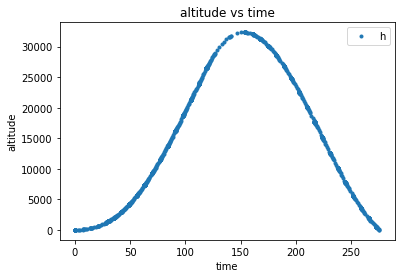

In [41]:
# Visualise h vs t
df.plot(x='t', y='h', style='.')
plt.xlabel("time")
plt.ylabel("altitude")
plt.title("altitude vs time")
plt.show()

## Velocity vs Time
From this graph, we can see that the velocity of the rocket was decreasing towards the end of the simulation. So, by adjusting the landing fuel reserves, we might be able to bring the touchdown velocity even further.

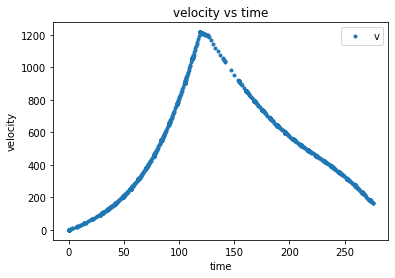

In [42]:
# Visualise v vs t
df.plot(x='t', y='v', style='.')
plt.xlabel("time")
plt.ylabel("velocity")
plt.title("velocity vs time")
plt.show()

## Velocity vs Altitude

From this graph, we can see that the velocity of the rocket was decreasing as it started approaching the ground, implying the PID controller was working nominaly.

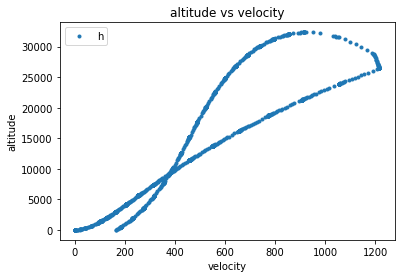

In [47]:
# Visualise v vs h
df.plot(x='v', y='h', style='.')
plt.xlabel("velocity")
plt.ylabel("altitude")
plt.title("altitude vs velocity")
plt.show()

## Downrange Position vs Time
From this graph, we can see that the rocket was going downrange across the entire duration of the flight, and briefly (towards the middle of the flight) the rocket had a strong x-component of velocity.

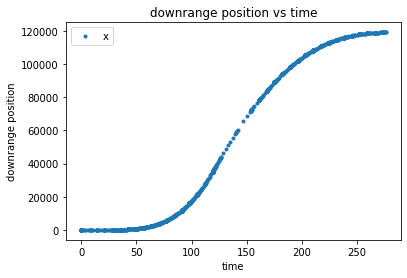

In [43]:
# Visualise x vs t
df.plot(x='t', y='x', style='.')
plt.xlabel("time")
plt.ylabel("downrange position")
plt.title("downrange position vs time")
plt.show()

## Pitch Angle Vs Time
From this graph, we can see that the pitch-over manuever worked successfully, as is indicated by the pitch angle jumps from 0 to pi radians. We can also see tha the PID controller was working nominally, correcting the pitch angle frequently to ensure the rocket stays upright during the second half of flight.

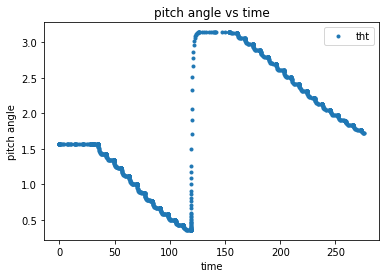

In [44]:
# Visualise tht vs t
df.plot(x='t', y='tht', style='.')
plt.xlabel("time")
plt.ylabel("pitch angle")
plt.title("pitch angle vs time")
plt.show()

## Velocity vs Pitch Angle
The left half of the plot is from the powered ascent phase, and the right half from the powered descent phase.

From this plot, we can clearly see the pitch over manuever the rocket underwent, and also see how the PID controller was working to get the rocket as stable vertical as possible.



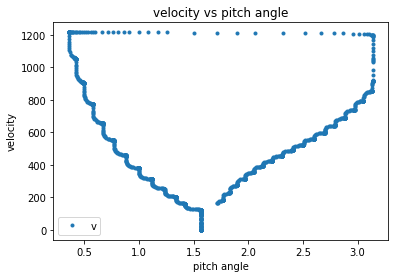

In [50]:
# Visualise v vs tht
df.plot(x='tht', y='v', style='.')
plt.xlabel("pitch angle")
plt.ylabel("velocity")
plt.title("velocity vs pitch angle")
plt.show()

# Conclusions

- The PID controller works, but can be improved significantly.
- The split up of fuel between the two stages can be modified to improve performance.

# Future Work

- Using Reinforcement Learning to identify better values for the PID controller.
- Using a more robust atmospheric model to calculate Drag.
- I assumed constant mass flow rate and 100% engine efficiency for the rocket for this simulation. In the future, we could look into more realistic models for the same.